## Nearest Neighbors Classification
This example shows how to use `KNeighborsClassifier`. We train such a classifier on the dataset and observe the difference of the decision boundary obtained with regrads to the parameter `weights`.

1. Load the data

In [31]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Import the libraries
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the data
iris = datasets.load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

2. Train the KNN classifier
   
We want to use a knn classifier considering a neighborhood of 11 data points. Since our knn model uses euclidean distance to find the nearest neighbors, it is therefore important to scale the data beforehand.

In [32]:
# Import the libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

3. Plot the decision boundary

We fit two classifiers with different values of the parameter `weights`. We plot the decision boundary of each classifier as well as the original dataset to observe the difference.

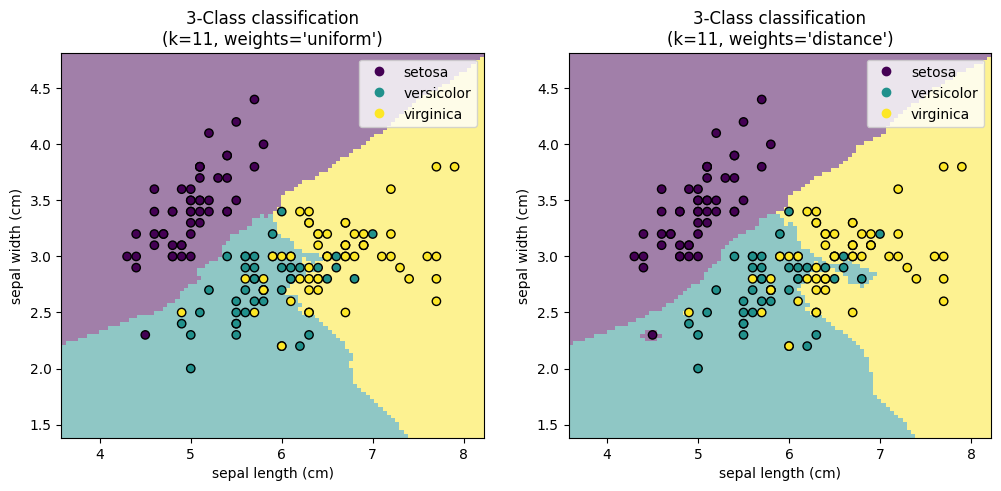

In [33]:
# Import the library
from sklearn.inspection import DecisionBoundaryDisplay

plots, axs = plt.subplots(ncols=2, figsize=(12,5))

for ax, weights in zip(axs, ("uniform", "distance")):
    # Plot the decision boundary
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    graph = DecisionBoundaryDisplay.from_estimator(
        estimator=clf,
        X=X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    # Plot the training data
    scatter = graph.ax_.scatter(
        X.iloc[:, 0],
        X.iloc[:, 1],
        c=y,
        edgecolors="k",
    )
    graph.ax_.legend(
        scatter.legend_elements()[0],
        iris["target_names"],
    )
    graph.ax_.set_title(f"3-Class classification\n(k=11, weights={weights!r})")

plt.show()